<a href="https://colab.research.google.com/github/FelipeRaC/Data-Science-Machine-Learning-Portfolio/blob/main/Abnormality_Detection_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a practical approach to Abnormal Detection problem using Autoencoder, in this case CNN based autoencoder.**

As a brief explanation abnormality detection with autoencoder is done by training the model to compress or encode the data and then reconstruct or decode it. For this application the model is only train in 'Normal' data. 
The goals is that the model learn to reconstruct normal data better than abnormal data because it didnt see it during the training process.

The indication that leads to a classification is the loss that the model has to normal and abnormal data.

The Dataset is from https://data.openei.org/submissions/623

Abstract
Gearbox Fault Diagnosis Data set include the vibration dataset recorded by using SpectraQuests Gearbox Fault Diagnostics Simulator.
Dataset has been recorded with the help of 4 vibration sensors placed in four different direction.
Data set has been recorded under variation of load from '0' to '90' percent.
Data set has been recorded in two different scenario: 1) Healthy condition and 2) Broken Tooth Condition

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/My Drive/Colab Notebooks/Gearbox Fault Diagnosis"

'Abnormality Detection Autoencoders.ipynb'   BrokenTooth   Healthy


In [ ]:
healthy_dir= os.path.join('drive/My Drive/Colab Notebooks/Gearbox Fault Diagnosis/Healthy')
broken_dir= os.path.join('drive/My Drive/Colab Notebooks/Gearbox Fault Diagnosis/BrokenTooth')

Lets read of the CSV files for healthy and broken gearbox and store them in dataframes

In [ ]:
df_h10= pd.read_csv((healthy_dir +'/h30hz10.csv'))
df_h20= pd.read_csv((healthy_dir +'/h30hz20.csv'))
df_h30= pd.read_csv((healthy_dir +'/h30hz30.csv'))
df_h40= pd.read_csv((healthy_dir +'/h30hz40.csv'))
df_h50= pd.read_csv((healthy_dir +'/h30hz50.csv'))
df_h60= pd.read_csv((healthy_dir +'/h30hz60.csv'))
df_h70= pd.read_csv((healthy_dir +'/h30hz70.csv'))
df_h80= pd.read_csv((healthy_dir +'/h30hz80.csv'))
df_h90= pd.read_csv((healthy_dir +'/h30hz90.csv'))

In [ ]:
df_b10= pd.read_csv((broken_dir +'/b30hz10.csv'))
df_b20= pd.read_csv((broken_dir +'/b30hz20.csv'))
df_b30= pd.read_csv((broken_dir +'/b30hz30.csv'))
df_b40= pd.read_csv((broken_dir +'/b30hz40.csv'))
df_b50= pd.read_csv((broken_dir +'/b30hz50.csv'))
df_b60= pd.read_csv((broken_dir +'/b30hz60.csv'))
df_b70= pd.read_csv((broken_dir +'/b30hz70.csv'))
df_b80= pd.read_csv((broken_dir +'/b30hz80.csv'))
df_b90= pd.read_csv((broken_dir +'/b30hz90.csv'))

In [ ]:
df_h10.head()

,a1,a2,a3,a4
0,-0.169381,-1.282080,3.302820,-1.556990
1,3.945820,-0.220907,-0.003485,-0.174652
2,0.888728,0.694251,-0.035491,-0.470260
3,-2.332820,-1.578870,1.306010,-1.295540
4,1.755510,2.084890,0.348722,0.502751


In [ ]:
df_b10.head()

,a1,a2,a3,a4
0,1.260410,-1.35726,-1.916330,1.84570
1,-0.126204,-2.27283,0.536155,1.53092
2,-0.903164,-1.04204,-0.741337,1.65011
3,-1.693560,2.79295,-0.066998,2.01735
4,-3.556980,2.11411,0.225473,2.32982


Check the size of the dataframes and if there is a missing value in them 

In [ ]:
print('10% load, healthy:',df_h10.shape,'broken:',df_b10.shape)
print('20% load, healthy:',df_h20.shape,'broken:',df_b20.shape)
print('30% load, healthy:',df_h30.shape,'broken:',df_b30.shape)
print('40% load, healthy:',df_h40.shape,'broken:',df_b40.shape)
print('50% load, healthy:',df_h50.shape,'broken:',df_b50.shape)
print('60% load, healthy:',df_h60.shape,'broken:',df_b60.shape)
print('70% load, healthy:',df_h70.shape,'broken:',df_b70.shape)
print('80% load, healthy:',df_h80.shape,'broken:',df_b80.shape)
print('90% load, healthy:',df_h90.shape,'broken:',df_b90.shape)

10% load, healthy: (92928, 4) broken: (111616, 4)
20% load, healthy: (108544, 4) broken: (114432, 4)
30% load, healthy: (106240, 4) broken: (89856, 4)
40% load, healthy: (100608, 4) broken: (94464, 4)
50% load, healthy: (110848, 4) broken: (94208, 4)
60% load, healthy: (99840, 4) broken: (95488, 4)
70% load, healthy: (101376, 4) broken: (100864, 4)
80% load, healthy: (99840, 4) broken: (110335, 4)
90% load, healthy: (106752, 4) broken: (105728, 4)


In [ ]:
print('Missing Data')
print('10 load, healthy:',df_h10.isna().sum().sum(),'broken:', df_b10.isna().sum().sum())
print('20 load, healthy:',df_h20.isna().sum().sum(),'broken:', df_b20.isna().sum().sum())
print('30 load, healthy:',df_h30.isna().sum().sum(),'broken:', df_b30.isna().sum().sum())
print('40 load, healthy:',df_h40.isna().sum().sum(),'broken:', df_b40.isna().sum().sum())
print('50 load, healthy:',df_h50.isna().sum().sum(),'broken:', df_b50.isna().sum().sum())
print('60 load, healthy:',df_h60.isna().sum().sum(),'broken:', df_b60.isna().sum().sum())
print('70 load, healthy:',df_h70.isna().sum().sum(),'broken:', df_b70.isna().sum().sum())
print('80 load, healthy:',df_h80.isna().sum().sum(),'broken:', df_b80.isna().sum().sum())
print('90 load, healthy:',df_h90.isna().sum().sum(),'broken:', df_b90.isna().sum().sum())

Missing Data
10 load, healthy: 0 broken: 0
20 load, healthy: 0 broken: 0
30 load, healthy: 0 broken: 0
40 load, healthy: 0 broken: 0
50 load, healthy: 0 broken: 0
60 load, healthy: 0 broken: 0
70 load, healthy: 0 broken: 0
80 load, healthy: 0 broken: 0
90 load, healthy: 0 broken: 0


In [ ]:
df_h80.describe()

,a1,a2,a3,a4
count,99840.000000,99840.000000,99840.000000,99840.000000
mean,0.020186,-0.002862,0.021235,0.004074
std,8.266885,4.630215,4.654600,5.158115
min,-41.989200,-25.589600,-26.704200,-27.290700
25%,-4.895252,-2.789022,-2.673795,-2.913327
50%,-0.077990,0.078719,0.108989,0.174863
75%,4.896152,2.838167,2.809145,3.070162
max,47.956600,23.829500,23.457200,25.884000


In [ ]:
df_b80.describe()

,a1,a2,a3,a4
count,110335.000000,110335.000000,110335.000000,110335.000000
mean,0.002270,0.000112,0.003052,0.020562
std,5.326383,4.897108,4.278515,5.062279
min,-25.166400,-29.703700,-23.172700,-23.474100
25%,-3.296025,-2.972320,-2.432190,-2.918850
50%,-0.054986,0.158398,0.093988,0.126907
75%,3.213095,3.140815,2.518600,3.022400
max,25.635100,22.612200,21.586100,25.878900


Let visualize the data

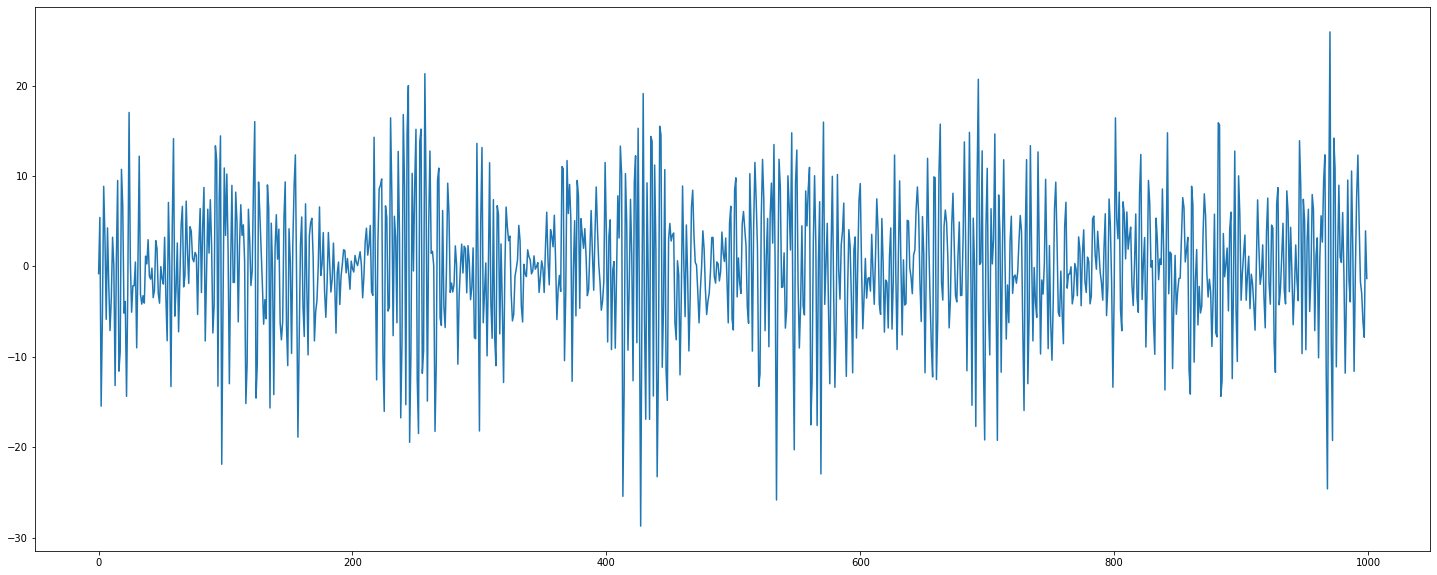

In [ ]:
df_h90['a1'][:1000].plot.line(figsize=(25,10))

The goal of the next code is to determine if there is a sensor that is more representative than the others. This will by determine by the highest distance using the Dynamic Distance Wrapping function, this is highly use to compare the similarity between two time series that have different length.

We will also use MSE error as an other value to compare similarity, for this time series need to be equal length 

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
a1_d=[]
a2_d=[]
a3_d=[]
a4_d=[]
d=[[df_h10,df_b10],[df_h20,df_b20],[df_h30,df_b30],[df_h40,df_b40],[df_h50,df_b50],[df_h60,df_b60],[df_h70,df_b70],[df_h80,df_b80],[df_h90,df_b90]]

for x,y in d:
  distance_a1, path = fastdtw(x['a1'], y['a1'], dist=euclidean)
  distance_a2, path = fastdtw(x['a2'], y['a2'], dist=euclidean)
  distance_a3, path = fastdtw(x['a3'], y['a3'], dist=euclidean)
  distance_a4, path = fastdtw(x['a4'], y['a4'], dist=euclidean)
  a1_d.append(distance_a1)
  a2_d.append(distance_a2)
  a3_d.append(distance_a3)
  a4_d.append(distance_a4)

In [ ]:
print('A1:',np.array(a1_d).mean(),'A2:', np.array(a2_d).mean(),'A3:', np.array(a3_d).mean(),'A4:', np.array(a4_d).mean())

A1: 607875.6972030867 A2: 401487.66604346246 A3: 402005.0383879546 A4: 377227.12272782304


In [ ]:
from sklearn.metrics import mean_absolute_error
a1_mse=[]
a2_mse=[]
a3_mse=[]
a4_mse=[]

for x,y in d:
  a1= mean_absolute_error(x['a1'][:89000], y['a1'][:89000])
  a2= mean_absolute_error(x['a2'][:89000], y['a2'][:89000])
  a3= mean_absolute_error(x['a3'][:89000], y['a3'][:89000])
  a4= mean_absolute_error(x['a4'][:89000], y['a4'][:89000])
  a1_mse.append(a1)
  a2_mse.append(a2)
  a3_mse.append(a3)
  a4_mse.append(a4)

print('A1:',np.array(a1_mse).mean(),'A2:', np.array(a2_mse).mean(),'A3:', np.array(a3_mse).mean(),'A4:', np.array(a4_mse).mean())

A1: 6.727755106982651 A2: 4.817125430902912 A3: 4.3409262502942925 A4: 4.970570380157173


This model is based on CNN layers, so its necesary to change the data from a time series of vibration values to an spectrogram, to be able to train this type of arquitechture. For this will use librosa library

For this the A1 sensor will be the only one used.

In [ ]:
FRAME_SIZE = 255
HOP_SIZE = 16
S_scale = librosa.stft(df_h20['a1'][10000:10500].to_numpy(), n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale_b = librosa.stft(df_b20['a1'][10000:10500].to_numpy(), n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
print(S_scale.shape)
type(S_scale[0][0])

(128, 32)


numpy.complex128

In [ ]:
Y_scale = np.abs(S_scale) ** 2
Y_scale_b= np.abs(S_scale_b) ** 2
print(Y_scale.shape)
type(Y_scale[0][0])

(128, 32)


numpy.float64

In [ ]:
def plot_spectrogram(Y, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,  
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

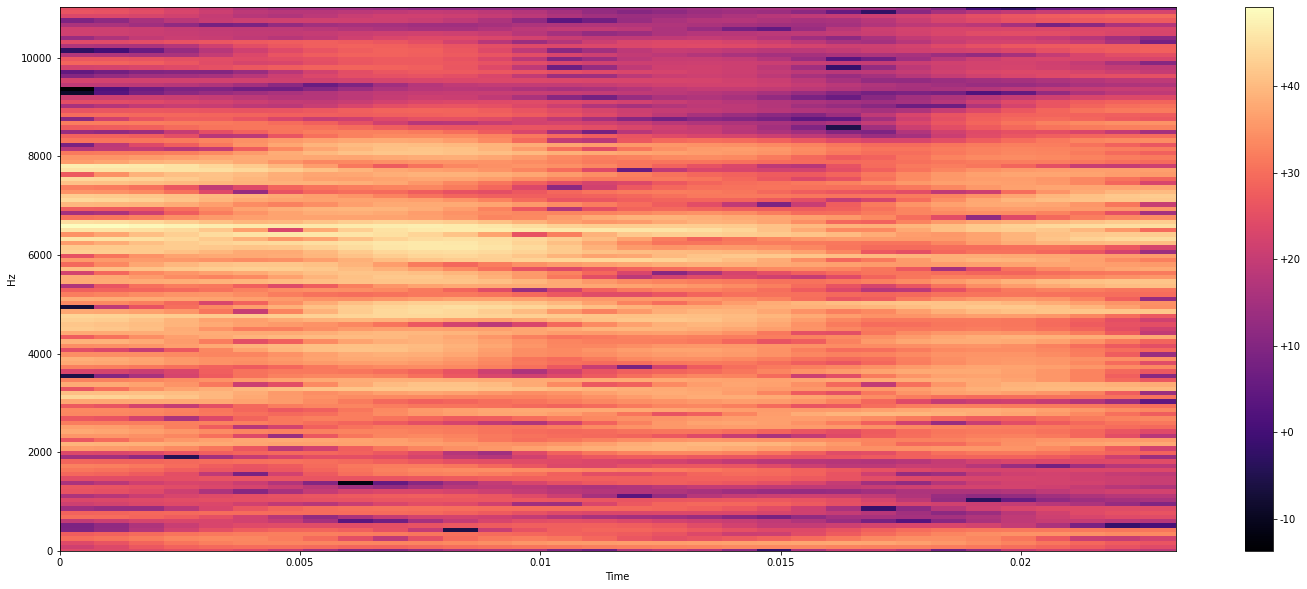

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, HOP_SIZE)

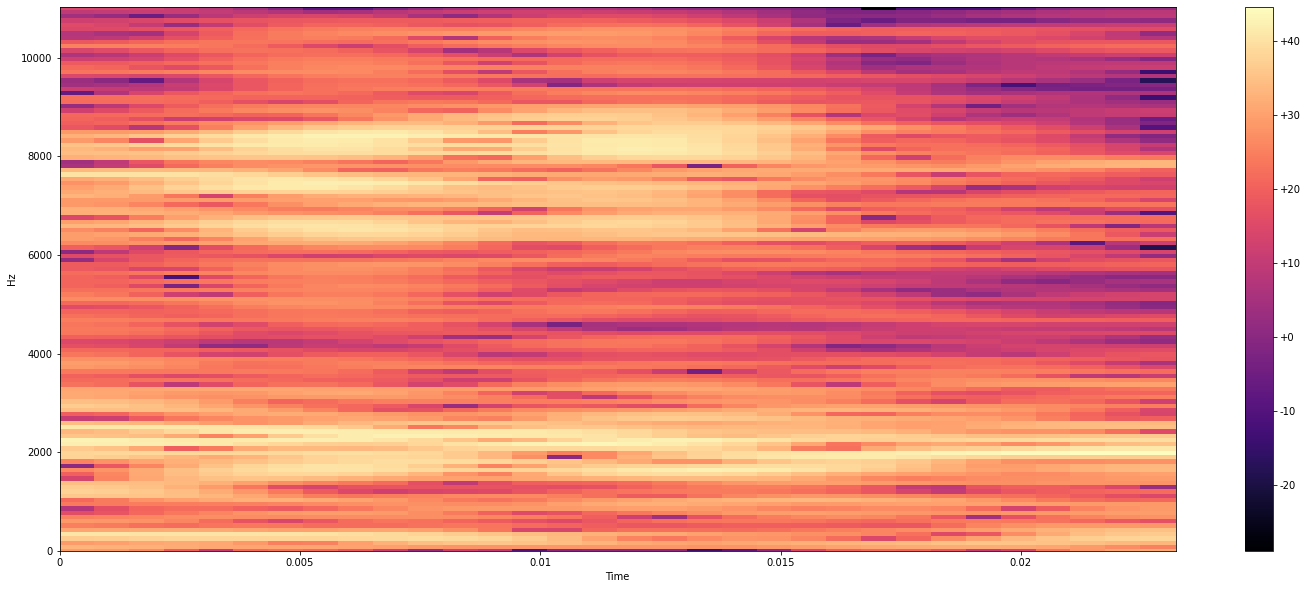

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale_b)
plot_spectrogram(Y_log_scale, HOP_SIZE)

The next function creates 2 arrays, one for healthy gearbox and one for broken gearbox, the data of all loads is put in the same array corresponding to the state of the gearbox, only A1 sensor will be analyzed because its the one with higher DTW distance

In [ ]:
def prepare_spectrograms(FRAME_SIZE = 255,HOP_SIZE = 16, sensor= 'a1'):
    images_h=[]
    images_b=[]
    for x in [df_h10,df_h20,df_h30,df_h40,df_h50,df_h60,df_h70,df_h80,df_h90]:
        for i in np.arange(500,89000,500):
            S_scale = librosa.stft(x[sensor][i-500:i].to_numpy(), n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
            Y_scale = np.abs(S_scale) ** 2
            Y_log_scale = librosa.power_to_db(Y_scale)
            images_h.append(Y_log_scale)
    for x in [df_b10,df_b20,df_b30,df_b40,df_b50,df_b60,df_b70,df_b80,df_b90]:
        for i in np.arange(500,89000,500):
            S_scale = librosa.stft(x[sensor][i-500:i].to_numpy(), n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
            Y_scale = np.abs(S_scale) ** 2
            Y_log_scale = librosa.power_to_db(Y_scale)
            images_b.append(Y_log_scale)
    images_h=np.array(images_h)
    images_b=np.array(images_b)
    return images_h, images_b

In [ ]:
images_h, images_b= prepare_spectrograms()
shape=images_h.shape
print(images_h.shape, images_b.shape)

(1593, 128, 32) (1593, 128, 32)


Next i split the healthy spectrograms into train and test subsets, for the case of broken will remain the same.

Then we will perform a Min Max scale to the dataset, based on the min and max of the training dataset 

Finaly we have to increase the dimension of the dataset to have it ready to feed the model. (samples, height, width, channels), in this case channels will by 1

In [ ]:
from sklearn.model_selection import train_test_split

images_h_train, images_h_test = train_test_split(images_h, train_size=.75)
train_shape=images_h_train.shape
test_shape=images_h_test.shape
print(images_h_train.shape, images_h_test.shape)

(1194, 128, 32) (399, 128, 32)


In [ ]:
h_train=images_h_train.flatten()
h_test=images_h_test.flatten()
b=images_b.flatten()
mean= h_train.mean()
std= h_train.std()
min= h_train.min()
max= h_train.max()
print(h_train.shape, h_test.shape, b.shape, h_test.shape, mean, std, min, max)

(4890624,) (1634304,) (6524928,) (1634304,) 29.851056490302682 9.416690220828515 -34.776969094857755 61.694354423303494


In [ ]:
h_train= np.divide(np.subtract(h_train, min), np.subtract(max, min))
h_test= np.divide(np.subtract(h_test, min), np.subtract(max, min))
b= np.divide(np.subtract(b, min), np.subtract(max, min))

In [ ]:
images_h_train= np.reshape(h_train,train_shape)
images_h_test= np.reshape(h_test,test_shape)
images_b= np.reshape(b,shape)

In [ ]:
images_h_train = np.expand_dims(images_h_train, axis=-1)
images_h_test = np.expand_dims(images_h_test, axis=-1)
images_b = np.expand_dims(images_b, axis=-1)
print(images_h_train.shape, images_h_test.shape, images_b.shape)

(1194, 128, 32, 1) (399, 128, 32, 1) (1593, 128, 32, 1)


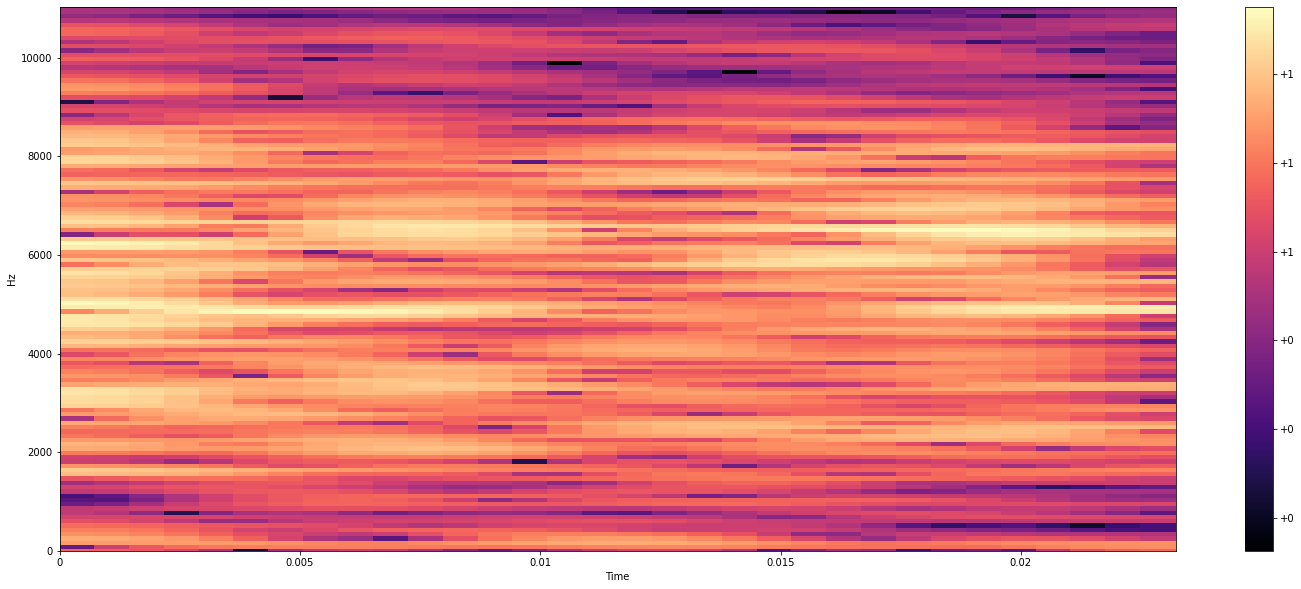

In [ ]:
plot_spectrogram(images_h_train[5,:,:,0], HOP_SIZE)

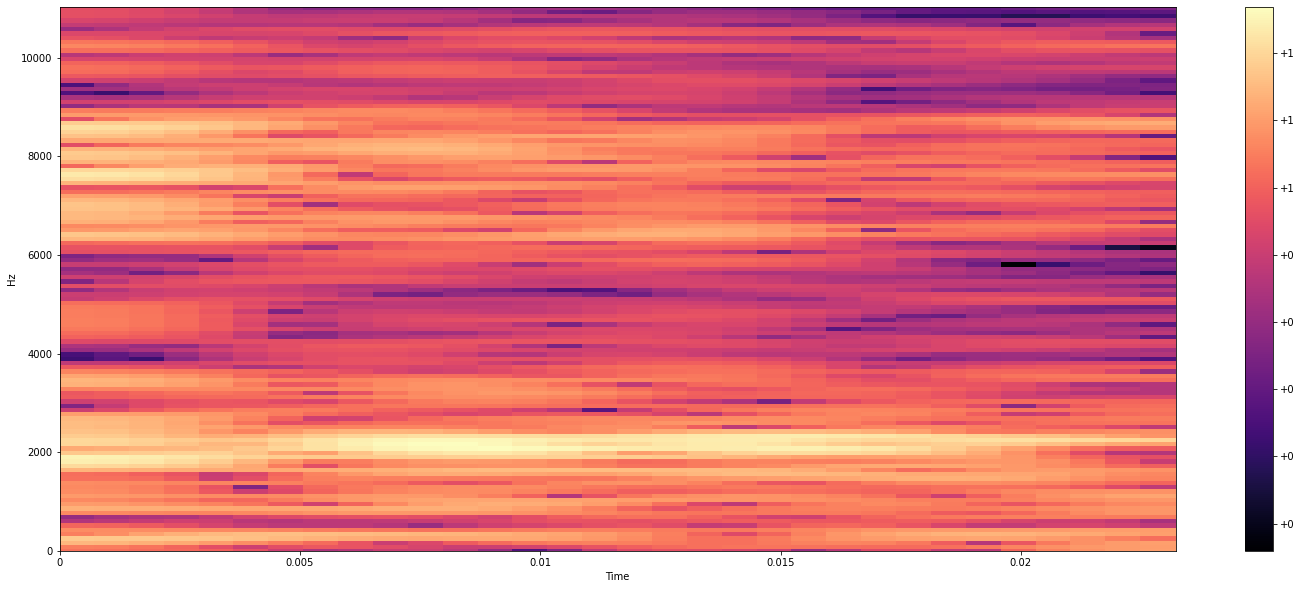

In [ ]:
plot_spectrogram(images_b[5,:,:,0], HOP_SIZE)

Now is time to build the CNN Autoencoder model, this type of models can be build using Con2D and Conv2DTranspose layers or Conv2D, MaxPooling2D and  UpSampling2D, for this exercise will use the second option

The models input and output will have shape (None, 128,32,1), which is the size of the spectrogram and the expected reconstruction done by the model, loss function will be MSE

The main objective of the model is to recostruct the spectrogram as it can best do, so the input and output will be the training dataset

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input, MaxPooling2D, UpSampling2D
from tensorflow.keras import optimizers, Sequential, Model

def build_cnn_autoencoder(shape=(128, 32, 1), lr= .0001):
    input_img = Input(shape=shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    autoencoder.compile(optimizer=opt, loss='mse')
    return autoencoder

In [ ]:
auto_encoder= build_cnn_autoencoder(lr=.001)
auto_encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 32, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 32, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 8, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 8, 16)         4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 4, 16)         0     

In [ ]:
history = auto_encoder.fit(images_h_train,images_h_train, epochs=15 , verbose=1 ,shuffle=True, batch_size= 64)

Epoch 1/15
19/19 [==============================] - 33s 60ms/step - loss: 0.0202
Epoch 2/15
19/19 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 3/15
19/19 [==============================] - 0s 19ms/step - loss: 0.0058
Epoch 4/15
19/19 [==============================] - 0s 18ms/step - loss: 0.0052
Epoch 5/15
19/19 [==============================] - 0s 18ms/step - loss: 0.0050
Epoch 6/15
19/19 [==============================] - 0s 18ms/step - loss: 0.0049
Epoch 7/15
19/19 [==============================] - 0s 18ms/step - loss: 0.0049
Epoch 8/15
19/19 [==============================] - 0s 18ms/step - loss: 0.0048
Epoch 9/15
19/19 [==============================] - 0s 19ms/step - loss: 0.0049
Epoch 10/15
19/19 [==============================] - 0s 19ms/step - loss: 0.0048
Epoch 11/15
19/19 [==============================] - 0s 19ms/step - loss: 0.0047
Epoch 12/15
19/19 [==============================] - 0s 19ms/step - loss: 0.0047
Epoch 13/15
19/19 [=================

Now is time to evaluate the model, for abnormality detection using autoencoder we focus on the loss of the model to determine wether the input is or isn´t abnormal. 


In [ ]:
pred_good_train= auto_encoder.predict(images_h_train)
pred_good_test= auto_encoder.predict(images_h_test)
pred_bad= auto_encoder.predict(images_b)

Let´s plot the reconstructed spectrogram output by the model

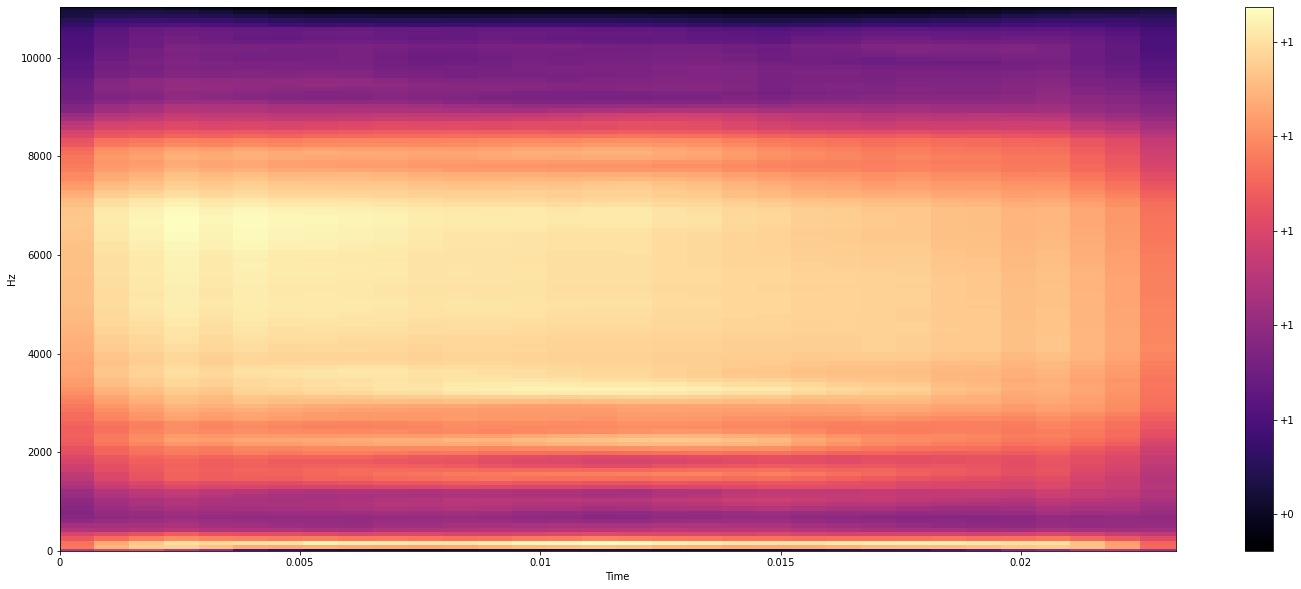

In [ ]:
plot_spectrogram(pred_good_test[15,:,:,0], HOP_SIZE)

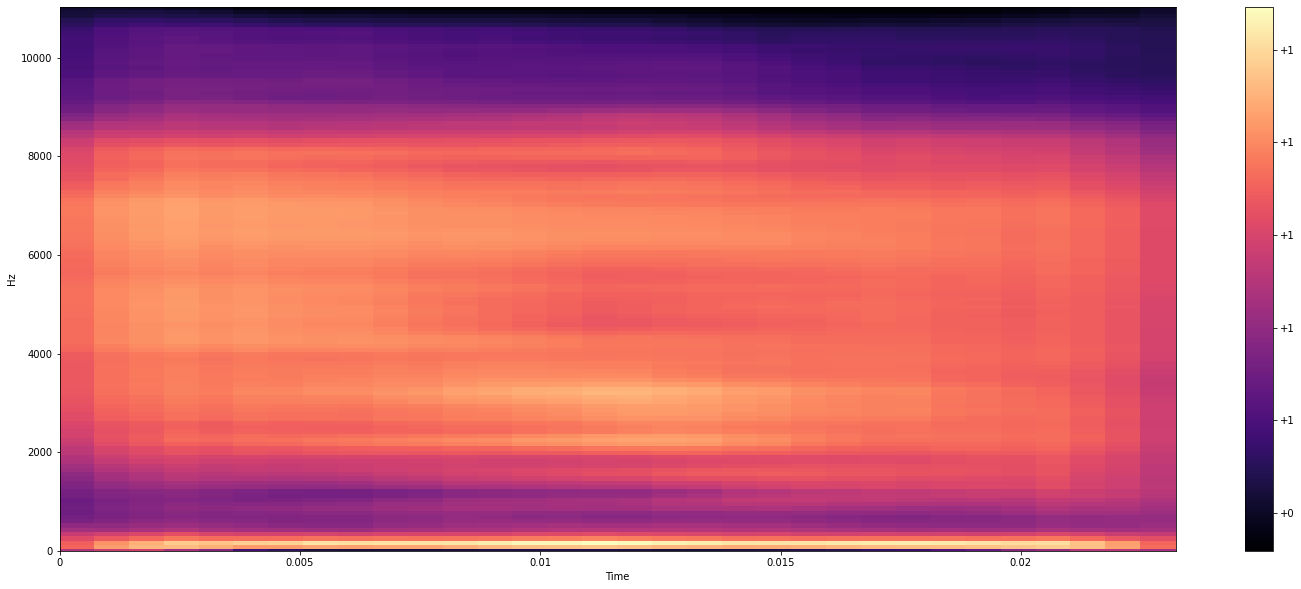

In [ ]:
plot_spectrogram(pred_bad[9,:,:,0], HOP_SIZE)

Can be seen that both cases were reconstructed close to the input, we can still see more vibrarion around the 6000Hz in good ones and 2000Hz in bad ones.

Now is time to check the loss of the model with both normal and abnormal cases to see if the can be differentiable by the use of a threshold

Loss of the model with test healthy gearbox 

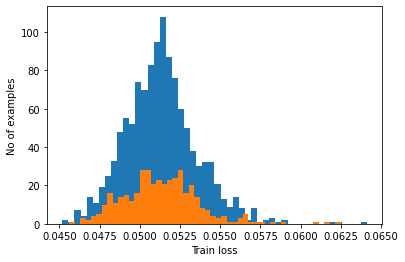

In [ ]:
loss_good_train=tf.keras.losses.mae(pred_good_train, images_h_train)
loss_good_test=tf.keras.losses.mae(pred_good_test, images_h_test)
plt.hist(np.mean(np.mean(loss_good_train, axis=1), axis=1), bins=50)
plt.hist(np.mean(np.mean(loss_good_test, axis=1), axis=1), bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Loss of the model with broken gearbox

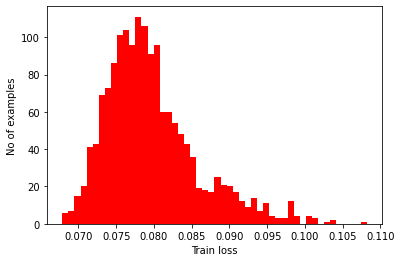

In [ ]:
loss_bad=tf.keras.losses.mae(pred_bad, images_b)
plt.hist(np.mean(np.mean(loss_bad, axis=1), axis=1), bins=50, color='r')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

We can see there is a gap between the loss that the models has for both cases, for this problem a threshold of .06 can separete the abnormal cases form the normal, with some normal missclassified as abnormal.

Now lets plot them together to see it clearly

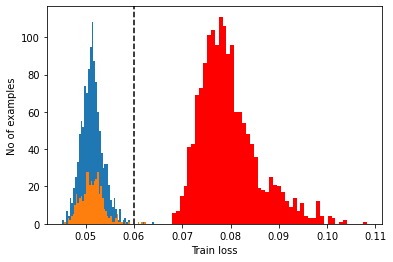

In [ ]:
plt.hist(np.mean(np.mean(loss_good_train, axis=1), axis=1), bins=50)
plt.hist(np.mean(np.mean(loss_good_test, axis=1), axis=1), bins=50)
plt.hist(np.mean(np.mean(loss_bad, axis=1), axis=1), bins=50, color='r')
plt.axvline(x=.06, color='k', linestyle='--')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()